In [1]:
# import required packages
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

#set debug
debug = False

In [3]:
# load in dample data
sample_data = np.genfromtxt('../data/project_one/TABLE2.csv', delimiter = ',')
print('Sample Data: \n'+sample_data) if debug else next

# init the doc and term labels for plotting and readability
doc_labels = ['cl','c2','c3','c4','c5','m1','m2','m3','m4']
terms = ['human','interface','computer','user','system','response','time','EPS','survey','trees','graph','minors']

In [4]:
# calculate the SVD
T,S,D = np.linalg.svd(sample_data, full_matrices = False)
print('Calculated T Data: \n'+T) if debug else next
print('Calculated S Data: \n'+S) if debug else next
print('Calculated D Data: \n'+D) if debug else next

# find the inverse of S for later computation
Si = 1/S
# convert 1x9 matrix to 9x9 by multiplying by the identity
Si = Si*np.identity(9)
print('S Inverse: \n'+Si) if debug else next

# find the transpose of D for later computation and plotting
Dt = np.transpose(D)
print('Transposed D: \n'+Dt) if debug else next

<function next>

In [5]:
# define a function that will add labels to a plot given the location, label, and offset from location
def plot_labels(data,labels,offset):
    for i in range(len(labels)):
        plt.text(data[i,0]+offset, data[i,1]-offset, labels[i], fontsize=8)

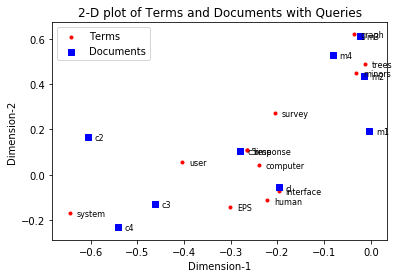

In [6]:
# plot Terms and Documents on a scatter
plt.scatter(T[:,0],  T[:,1],  color='red',   marker='.', label='Terms')
plt.scatter(Dt[:,0], Dt[:,1], color='blue',  marker='s', label='Documents')
# use labelling function above to plot labels
plot_labels(T,terms,0.015)
plot_labels(Dt,doc_labels,0.015)
# plot titles and misc
plt.title('2-D plot of Terms and Documents with Queries')
plt.xlabel('Dimension-1')
plt.ylabel('Dimension-2')
# show the plot and legend
plt.legend()
plt.show()

In [7]:
# init query labels
q_labels = ['q1','q2','q3','q4','q5']
# init the query matrix
X = [[0,0,0,1,0],
    [1,0,1,0,0],
    [1,1,0,0,0],
    [1,1,1,0,1],
    [0,0,1,2,0],
    [0,1,0,1,1],
    [0,1,0,0,0],
    [0,0,1,1,0],
    [0,1,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]]

# calculate the values of the query using results from SVD modelling
Q = np.matmul(np.matmul(np.transpose(X),T),Si)
print('Calculated Query Data: \n'+Q) if debug else next

<function next>

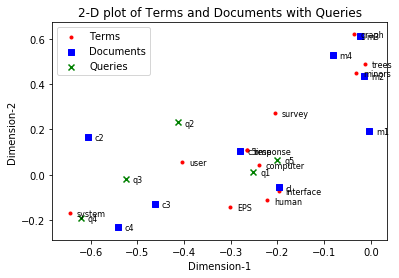

In [8]:
# plot Terms, Documents, and Query results on a scatter
plt.scatter(T[:,0],  T[:,1],  color='red',   marker='.', label='Terms')
plt.scatter(Dt[:,0], Dt[:,1], color='blue',  marker='s', label='Documents')
plt.scatter(Q[:,0],  Q[:,1],  color='green', marker='x', label='Queries')
# use labelling function above to plot labels
plot_labels(T,terms,0.015)
plot_labels(Dt,doc_labels,0.015)
plot_labels(Q,q_labels,0.015)
# plot titles and misc
plt.title('2-D plot of Terms and Documents with Queries')
plt.xlabel('Dimension-1')
plt.ylabel('Dimension-2')
# show the plot and legend
plt.legend()
plt.show()

In [9]:
# init lists to save distance and index information
T_dist_list = []
T_dist_index = []
Dt_dist_list = []
Dt_dist_index = []
# loop through each of the queries
for i in range(len(Q)):
    # for each query, populate a new row of the distance and index lists
    T_dist_list.append([np.inf,np.inf,np.inf])
    T_dist_index.append([np.inf,np.inf,np.inf])
    Dt_dist_list.append([np.inf,np.inf,np.inf])
    Dt_dist_index.append([np.inf,np.inf,np.inf])
    # single out the current query location
    q=Q[i,0:2]

    # loop through each of the terms
    for j in range(len(T)):
        # single out the current term location
        t=T[j,0:2]
        # find the current max distance and where it is being held
        list_max = np.amax(T_dist_list[i])
        max_index = np.where(T_dist_list[i] == np.amax(list_max))[0][0]
        # calculate the distance between the query location and the term location
        d = spatial.distance.cosine(q, t)
        # if the current distance is less than the max, then replace the max distance and its index
        if d < list_max:
            T_dist_list[i][max_index] = d
            T_dist_index[i][max_index] = j
        print(T_dist_list) if debug else next
        print(T_dist_index) if debug else next

    # loop through each of the documents
    for k in range(len(Dt)):
        # single out the current document location
        dt=Dt[k,0:2]
        # find the current max distance and where it is being held
        list_max = np.amax(Dt_dist_list[i])
        max_index = np.where(Dt_dist_list[i] == np.amax(list_max))[0][0]
        # calculate the distance between the query location and the document location
        d = spatial.distance.cosine(q, t)
        # if the current distance is less than the max, then replace the max distance and its index
        if d < list_max:
            Dt_dist_list[i][max_index] = d
            Dt_dist_index[i][max_index] = k
        print(Dt_dist_list) if debug else next
        print(Dt_dist_index) if debug else next

In [10]:
# loop through each query
for i in range(len(Q)):
    # print out the results of the top three closest terms
    print('\nThe three closest Terms by cosine distance to Query {} are:'.format(q_labels[i]))
    for j in range(len(T_dist_list[i])):
        print('    Term: {}, by a distance of: {}'.format(terms[T_dist_index[i][j]],T_dist_list[i][j]))

# loop through each query
for i in range(len(Q)):
    # print out the results of the top three closest documents
    print('\nThe three closest Documents by cosine distance to Query {} are:'.format(q_labels[i]))
    for j in range(len(T_dist_list[i])):
        print('    Document: {}, by a distance of: {}'.format(doc_labels[T_dist_index[i][j]],T_dist_list[i][j]))


The three closest Terms by cosine distance to Query q1 are:
    Term: user, by a distance of: 0.0046588152714202025
    Term: system, by a distance of: 0.04404244412641778
    Term: computer, by a distance of: 0.008918100156571018

The three closest Terms by cosine distance to Query q2 are:
    Term: time, by a distance of: 0.007981453721098042
    Term: response, by a distance of: 0.007981453721098042
    Term: computer, by a distance of: 0.05496474182626654

The three closest Terms by cosine distance to Query q3 are:
    Term: user, by a distance of: 0.015784826216144743
    Term: system, by a distance of: 0.023354078350298457
    Term: computer, by a distance of: 0.023023469808845065

The three closest Terms by cosine distance to Query q4 are:
    Term: EPS, by a distance of: 0.01019581723756302
    Term: interface, by a distance of: 0.0014373446109936516
    Term: system, by a distance of: 0.0008874254587586394

The three closest Terms by cosine distance to Query q5 are:
    Term: